# Trabajo practico de Minería de Datos - TUIA
- Brisa Moresco

In [1]:
!pip install plotly
!pip install umap-learn
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install gap-stat

  Using cached gap-stat-2.0.3.tar.gz (17 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: still running...
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [53 lines of output]
      C:\Users\brisa\AppData\Local\Temp\pip-build-env-bb109qv1\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      C:\Users\brisa\AppData\Local\Temp\pip-build-env-bb109qv1\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      running dist_info
      creating C:\Users\brisa\AppData\Local\Temp\pip-modern-metadata-t51dhtsg\gap_stat.egg-info
      writing C:\Users\brisa\AppData\Local\Temp\pip-modern-metadata-t51dhtsg\gap_stat.egg-info\PKG-INFO
      writing dependency_links to C:\Users\brisa\AppData\Local\Temp\pip-modern-metadata-t51dhtsg\gap_stat.egg-info\dependency_links.txt
      writing requirements to C:\Users\brisa\AppData\Local\Temp\pip-modern

In [7]:
%pip install package_name
%pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


c:\Users\brisa\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


Note: you may need to restart the kernel to use updated packages.


c:\Users\brisa\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [3]:
from umap import UMAP
import plotly.express as px
#from gap_statistic import OptimalK
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D

c:\Users\brisa\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Carga de datos

In [31]:
df = pd.read_csv('dxCropRecommendation.csv')
df

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cultivo
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Arroz
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Arroz
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Arroz
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Arroz
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Arroz
...,...,...,...,...,...,...,...,...
1595,107,34,32,26.774637,66.413269,6.780064,177.774507,Cafe
1596,99,15,27,27.417112,56.636362,6.086922,127.924610,Cafe
1597,118,33,30,24.131797,67.225123,6.362608,173.322839,Cafe
1598,117,32,34,26.272418,52.127394,6.758793,127.175293,Cafe


# Análisis de datos

In [32]:
# Analizamos los valores 
valores = df.head()
print(valores)

   Nitrogeno  Fosforo  Potasio  Temperatura    Humedad        pH      Lluvia  \
0         90       42       43    20.879744  82.002744  6.502985  202.935536   
1         85       58       41    21.770462  80.319644  7.038096  226.655537   
2         60       55       44    23.004459  82.320763  7.840207  263.964248   
3         74       35       40    26.491096  80.158363  6.980401  242.864034   
4         78       42       42    20.130175  81.604873  7.628473  262.717340   

  Cultivo  
0   Arroz  
1   Arroz  
2   Arroz  
3   Arroz  
4   Arroz  


In [33]:
# Analizamos la distribución 
distribucion = df.describe()
print(distribucion)

         Nitrogeno      Fosforo      Potasio  Temperatura      Humedad  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean     52.003750    53.145000    57.455625    25.627031    75.299276   
std      35.697954    37.949247    56.440856     5.384785    20.534713   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      23.000000    22.750000    25.000000    22.481574    63.675620   
50%      39.000000    47.000000    40.000000    25.662093    82.281131   
75%      86.000000    71.000000    53.000000    28.568738    91.337228   
max     120.000000   145.000000   205.000000    43.675493    99.981876   

                pH       Lluvia  
count  1600.000000  1600.000000  
mean      6.474024   104.126884  
std       0.658380    56.235890  
min       4.507524    20.211267  
25%       6.034347    66.697864  
50%       6.423214    97.318949  
75%       6.873499   117.947585  
max       8.868741   298.560117  


In [34]:
# Analizamos los tipos de datos
tipos = df.dtypes
print(tipos)

Nitrogeno        int64
Fosforo          int64
Potasio          int64
Temperatura    float64
Humedad        float64
pH             float64
Lluvia         float64
Cultivo         object
dtype: object


In [35]:
# Comprobar si hay valores nulos en todo el DataFrame
df.isnull().sum()

Nitrogeno      0
Fosforo        0
Potasio        0
Temperatura    0
Humedad        0
pH             0
Lluvia         0
Cultivo        0
dtype: int64

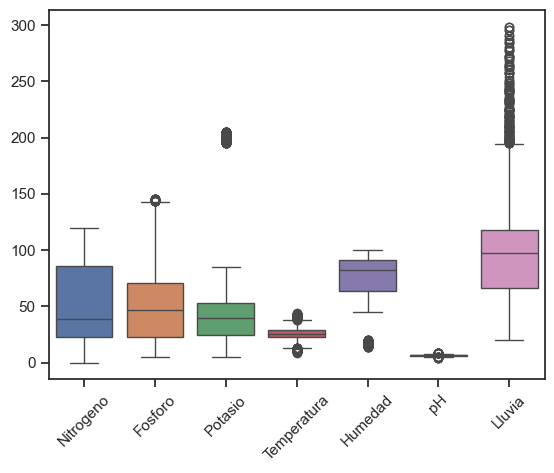

In [36]:
#Distribución de variables
sns.boxplot(data = df)
plt.xticks(rotation= 45)
plt.show()

Text(0.5, 0, 'pH')

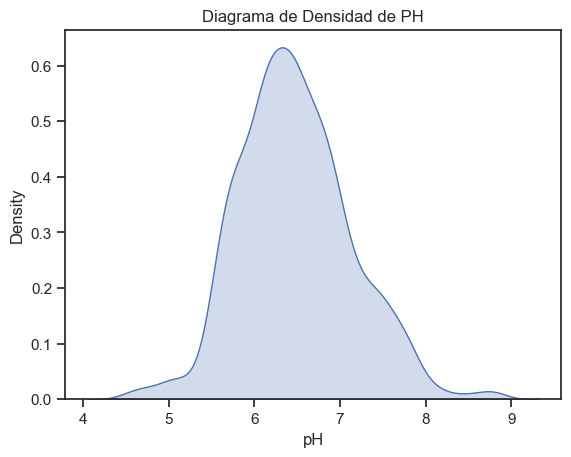

In [46]:
sns.kdeplot(data=df['pH'], fill=True)
plt.title('Diagrama de Densidad de PH')
plt.xlabel('pH')

Text(0.5, 0, 'Temperatura')

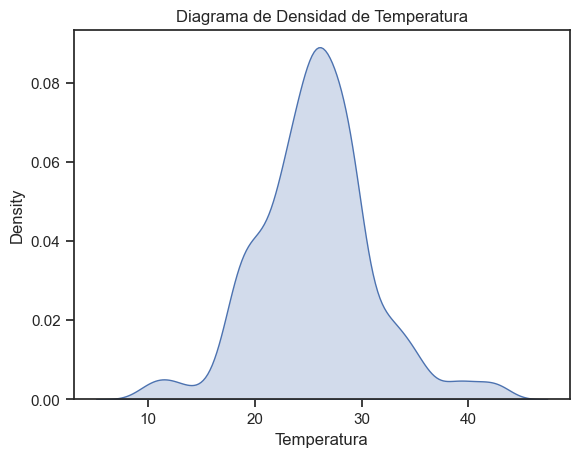

In [43]:
sns.kdeplot(data=df['Temperatura'], fill=True)
plt.title('Diagrama de Densidad de Temperatura')
plt.xlabel('Temperatura')

# Matriz de correlación

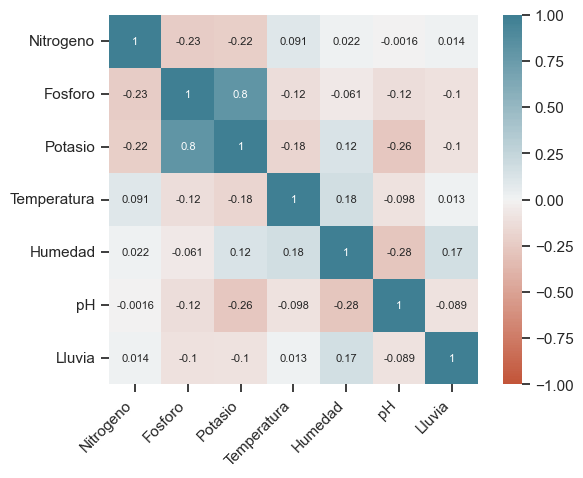

In [50]:
# Eliminamos la variable cualitativa y realizamos la matriz de correlación con todas las variables cuantitativas
corr = df.drop(['Cultivo'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

potacio y fosforo tienen una correlacion alta

# Normalización y Estandarización

In [52]:
from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

# Seleccionar las columnas numéricas (excluyendo la columna 'Cultivo')
columns_to_scale = ['Nitrogeno', 'Fosforo', 'Potasio', 'Temperatura', 'Humedad', 'pH', 'Lluvia']

# Aplicar StandardScaler solo a las columnas numéricas
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Mostrar las primeras filas del DataFrame escalado
print(df.head())

   Nitrogeno   Fosforo   Potasio  Temperatura   Humedad        pH    Lluvia  \
0   1.064714 -0.293774 -0.256200    -0.881887  0.326548  0.044002  1.757588   
1   0.924607  0.127974 -0.291646    -0.716421  0.244558  0.857025  2.179515   
2   0.224067  0.048896 -0.238477    -0.487186  0.342039  2.075714  2.843155   
3   0.616369 -0.478288 -0.309370     0.160514  0.236702  0.769365  2.467828   
4   0.728456 -0.293774 -0.273923    -1.021132  0.307166  1.754015  2.820975   

  Cultivo  
0   Arroz  
1   Arroz  
2   Arroz  
3   Arroz  
4   Arroz  


Utilizamos el método Z-score con la librería StandardScaler porque en su fórmula tiene en cuenta su media y varianza, ya que notamos que algunas de nuestras variables tienen una varianza muy alta.

# PCA

PCA se encarga de encontrar los componentes principales de un conjunto de datos. Estos componentes principales van a ser las direcciones en las cuales la varianza de los elementos es maxima, o sea, las direcciones en donde los elementos estan mas separados los unos de los otros.
Los comp ppales son todos ortogonales entre si.

* PCA tiene como max n-1 componentes principales que son ortogonales entre si
* cada componente principal es combinacion lineal de todas las variables que dan origen al dataset
* el objetivo es maximizar la varianza


In [75]:

# Obtener todas las componentes principales
pca = PCA(n_components=len(columns_to_scale), random_state=0)
pca_features = pca.fit_transform(df[columns_to_scale])

# Crear un DataFrame para las componentes principales
pca_df = pd.DataFrame(
    data=pca_features,
    columns=[f'P{i+1}' for i in range(len(columns_to_scale))]
)
pca_df['Cultivo'] = df['Cultivo']  

# Mostrar el DataFrame de PCA
print(pca_df)

            P1        P2        P3        P4        P5        P6        P7  \
0    -0.679163  0.601943  1.507909  1.364363  0.493099  0.238037 -0.047808   
1    -0.656053  0.269819  1.835039  1.063297  1.217446  0.691048 -0.230824   
2    -0.841368 -0.087601  2.592780  0.178132  1.840479  1.413747  0.008480   
3    -1.133296  0.755926  1.748575  0.370769  1.472582  0.428093  0.256406   
4    -1.054871 -0.063617  2.684205  0.901679  1.457319  1.260112  0.130674   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -1.366382  0.212861  0.474935  1.112050  1.258054 -0.008156  0.202612   
1596 -1.388433  0.219093 -0.265467  0.999754  0.398982 -1.055571  0.423834   
1597 -1.253954  0.404922  0.508465  1.720013  0.802948 -0.332032  0.076794   
1598 -1.370180 -0.526139 -0.288492  1.382442  1.033344 -0.355455  0.318827   
1599 -1.459826 -0.415178  0.339664  1.284423  0.524357 -0.130516  0.412704   

     Cultivo  
0      Arroz  
1      Arroz  
2      Arroz  
3  

Criterios de selección:

- Proporción de variancia acumulada (~75% -80%)​
- Criterio de Kaiser (eigenvalues > 1)​
- Gráfico del codo (Scree)

In [76]:
pca

PCA(n_components=7, random_state=0)

In [77]:
# Obtener los valores de los coeficientes (cargados) de cada componente principal
coefficients = pca.components_

# Crear un DataFrame para visualizar los coeficientes
coefficients_df = pd.DataFrame(
    data=coefficients,
    columns=columns_to_scale,
    index=[f'P{i+1}' for i in range(len(columns_to_scale))]
)

# Mostrar los coeficientes de las componentes principales
print(coefficients_df)


    Nitrogeno   Fosforo   Potasio  Temperatura   Humedad        pH    Lluvia
P1  -0.296443  0.625032  0.650819    -0.190099  0.044150 -0.220592 -0.105562
P2   0.122810 -0.070205  0.064990     0.384781  0.635231 -0.546338  0.354550
P3  -0.338649 -0.092112 -0.062606    -0.523805  0.039403  0.102180  0.765864
P4   0.826894  0.054688  0.128699    -0.501026 -0.066328 -0.191076  0.068966
P5   0.280129  0.383445  0.132670     0.521265 -0.330188  0.342751  0.508603
P6   0.141882  0.069053  0.144256    -0.089348  0.674462  0.693031 -0.105438
P7  -0.000425 -0.664179  0.716461     0.103472 -0.157026  0.090185  0.045313


In [78]:
# Obtener la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Crear función para acumular la varianza
def acumular(numbers):
    suma = 0
    var_c = []
    for num in numbers:
        suma += num
        var_c.append(suma)
    return var_c

# Acumular la varianza explicada
varianza_acumulada = acumular(varianza_explicada)

# Mostrar la varianza acumulada
print(varianza_acumulada)


[0.29046450553552833, 0.4995196512915331, 0.6427095607656281, 0.7705288738906562, 0.8772185598996394, 0.9759758120611617, 1.0000000000000002]


In [79]:
# Obtener los eigenvalues (valores propios)
eigenvalues = pca.explained_variance_

# Obtener la proporción de varianza explicada
proporcion_varianza = pca.explained_variance_ratio_

# Acumular la varianza explicada
varianza_acumulada = acumular(proporcion_varianza)

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Eigenvalues': eigenvalues,
    'Proporción de variancia explicada': proporcion_varianza,
    'Proporción acumulada de variancia explicada': varianza_acumulada
})

# Mostrar el DataFrame
resultados_df


,Eigenvalues,Proporción de variancia explicada,Proporción acumulada de variancia explicada
0,2.034523,0.290465,0.290465
1,1.464301,0.209055,0.499520
2,1.002956,0.143190,0.642710
3,0.895295,0.127819,0.770529
4,0.747295,0.106690,0.877219
5,0.691733,0.098757,0.975976
6,0.168274,0.024024,1.000000


## Graficamos la varianza acumulada.

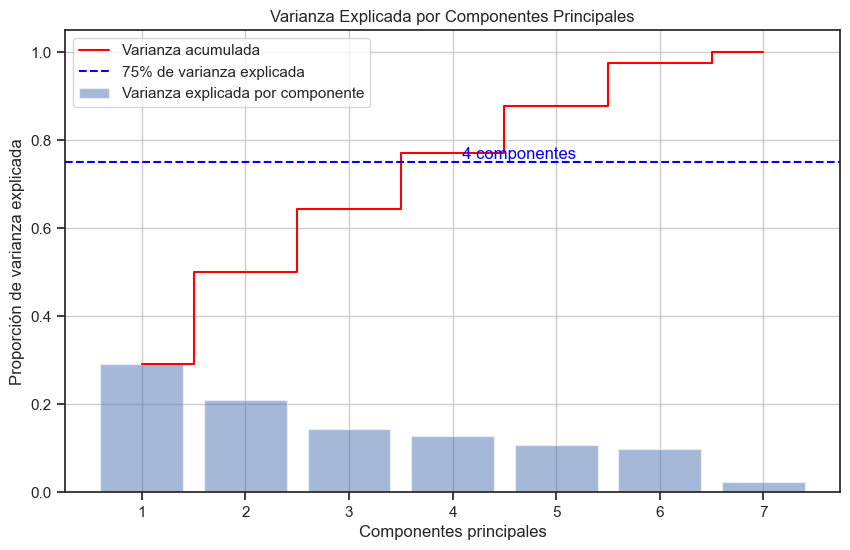

In [80]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(columns_to_scale) + 1), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center', label='Varianza explicada por componente')
plt.step(range(1, len(columns_to_scale) + 1), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red', label='Varianza acumulada')

# Calcular el punto donde se acumula el 75% de la varianza explicada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
index_75_percent = np.argmax(cumulative_variance >= 0.75) + 1
plt.axhline(y=0.75, color='blue', linestyle='--', label='75% de varianza explicada')

plt.text(index_75_percent, 0.75, f'  {index_75_percent} componentes', color='blue', verticalalignment='bottom')

# Configuración del gráfico
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.xticks(range(1, len(columns_to_scale) + 1)) 
plt.title('Varianza Explicada por Componentes Principales')
plt.legend()
plt.grid()
plt.show()


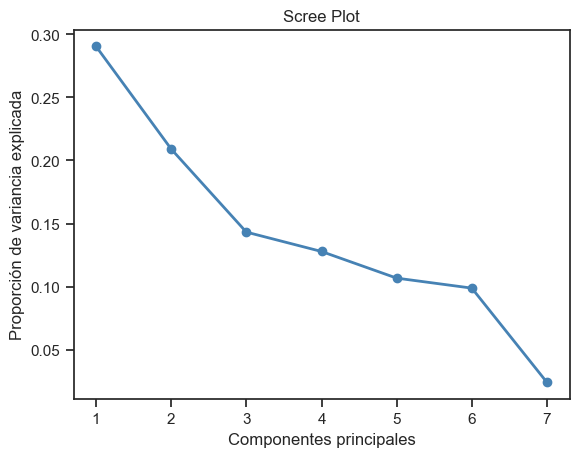

In [81]:
# Grafico de codo

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

En este gráfico no podemos observar un cambio muy brusco, ni una estabilización de la curva, así que decidi descartar este criterio

### Selección de Componentes Principales

**Proporción de Varianza Acumulada:**
- Se busca un número de componentes que alcance entre el 75% y el 80% de varianza acumulada. En este caso, con 3 componentes se alcanza un 77.05%, por lo que se conservarán al menos 3 componentes.

**Criterio de Kaiser:**
- Este criterio recomienda mantener solo los componentes con eigenvalues mayores que 1. Los tres primeros componentes tienen eigenvalues de 2.03, 1.46 y 1.00, lo que respalda la elección de 3 componentes.

A pesar de que el gráfico sugiere que se podrían considerar 4 componentes, se optará por mantener únicamente 3.

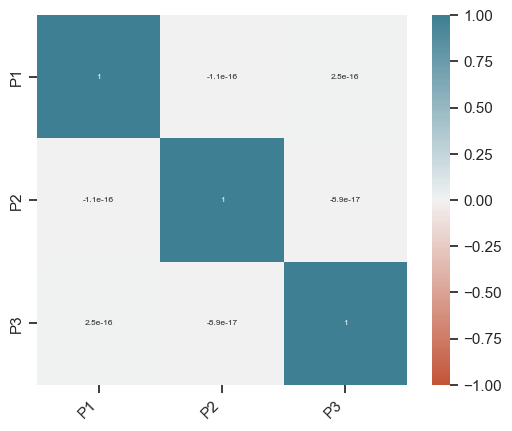

In [82]:
# Graficamos la matriz de correlación con los valores PCA seleccionados
# Para verificar que no hayan sido seleccionados erroneamente. las variables tienen que tener una correlacion lineal muy baja

corr = pca_df[['P1', 'P2', 'P3']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

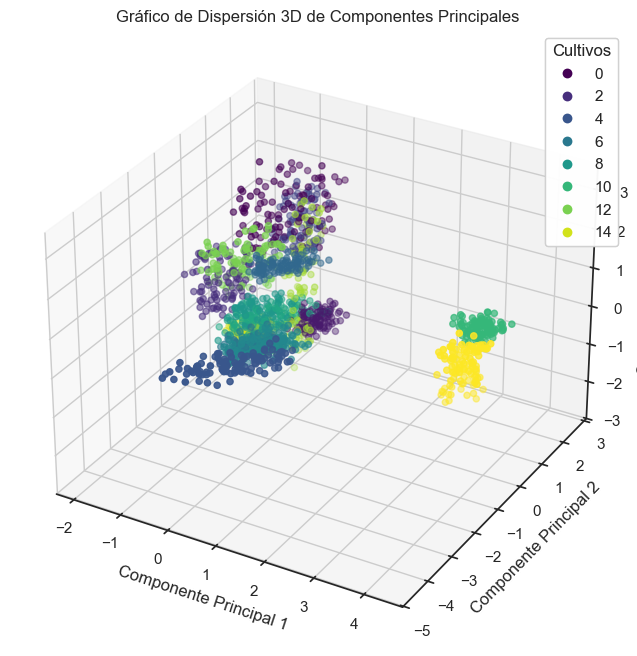

In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Supongamos que pca_features es un numpy array y df tiene la columna "Cultivo"
# Convertir pca_features a DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'P{i+1}' for i in range(pca_features.shape[1])])
pca_df['Cultivo'] = df['Cultivo'].values  # Asegúrate de que df tenga la columna "Cultivo"

# Crear gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Usar un scatter plot
scatter = ax.scatter(
    pca_df['P1'], pca_df['P2'], pca_df['P3'], 
    c=pca_df['Cultivo'].astype('category').cat.codes,  # Convertir la columna a códigos numéricos
    cmap='viridis'  # O puedes elegir otro cmap
)

# Añadir leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Cultivos")
ax.add_artist(legend1)

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

plt.title('Gráfico de Dispersión 3D de Componentes Principales')
plt.show()


# ISOMAP


Isomap es un método de reducción de dimensiones que se enfoca en preservar las distancias geodésicas entre los puntos. El proceso comienza estimando las distancias entre puntos utilizando los vecinos más cercanos en un grafo, basándose en las distancias euclidianas. Estas distancias se almacenan en un grafo ponderado, donde los pesos representan las distancias geodésicas. Finalmente, se utiliza este grafo para calcular los caminos mínimos entre los puntos.

**Distancia geodésica:** es la distancia de mínima longitud que conecta dos puntos en una superficie dada.

c:\Users\brisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning:

The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\brisa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

c:\Users\brisa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

c:\Users\brisa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.



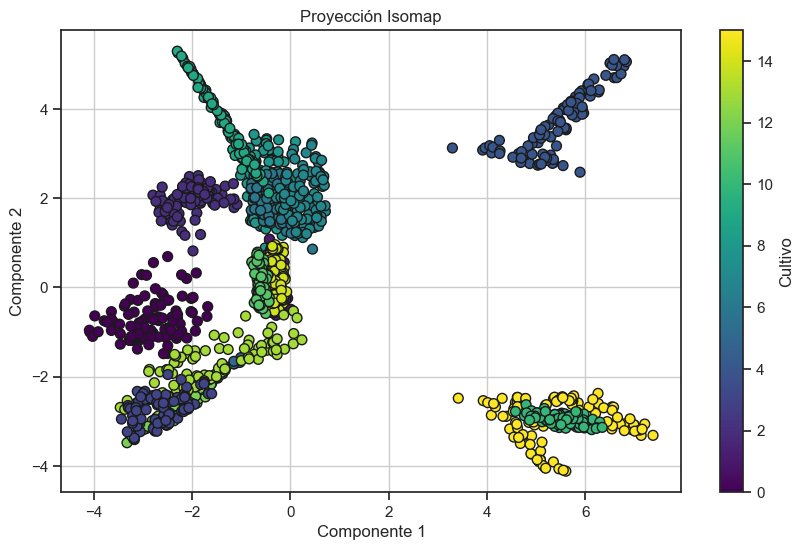

In [95]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

# Aplicar Isomap
isomap = Isomap(n_neighbors=20, n_components=2)
projections_isomap = isomap.fit_transform(df[columns_to_scale])  # Usa el DataFrame escalado

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    projections_isomap[:, 0],  # Componente 1
    projections_isomap[:, 1],  # Componente 2
    c=df['Cultivo'].astype('category').cat.codes,  # Convertir a códigos numéricos si es categórica
    cmap='viridis',  # Elegir un mapa de colores
    edgecolor='k',   # Color del borde de los puntos
    s=50             # Tamaño de los puntos
)

# Añadir leyenda
plt.colorbar(scatter, label='Cultivo')

# Etiquetas y título
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Proyección Isomap')
plt.grid()
plt.show()

# El parámetro n_neighbors se establece probando hasta obtener una representación visual atractiva.


# T-sne

T-sne sirve para la explotacion de datos y la visualizacion de los datos en alta dimension.

Este algoritmo calcula la medida de similitud entre pares de instancias en el espacio de alta dimension y en el espacio de baja dimension, y luego trata de optimizar estas dos medidas de similitud.

t-SNE es especialmente adecuado para captar relaciones y patrones complejos en los datos. Para ello, utiliza una distribución de probabilidad para
calcular la similitud entre los puntos de datos en las dimensiones originales y en el espacio de baja dimensión

c:\Users\brisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



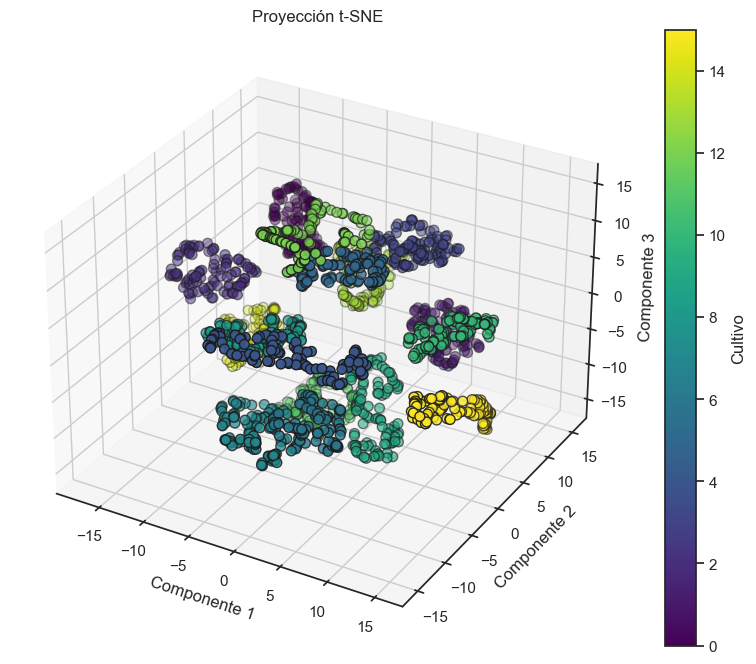

In [98]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Probar distintos parámetros
tsne = TSNE(n_components=3, random_state=0, perplexity=15, n_iter=500)
projections_tsne = tsne.fit_transform(pca_features)  

# Crear el gráfico de dispersión 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
scatter = ax.scatter(
    projections_tsne[:, 0],  # Componente 1
    projections_tsne[:, 1],  # Componente 2
    projections_tsne[:, 2],  # Componente 3
    c=df['Cultivo'].astype('category').cat.codes,  # Usa la columna 'Cultivo' para el color
    cmap='viridis',  # Mapa de colores
    edgecolor='k',   # Color del borde de los puntos
    s=50             # Tamaño de los puntos
)

# Añadir leyenda
plt.colorbar(scatter, label='Cultivo')

# Etiquetas y título
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.title('Proyección t-SNE')
plt.show()

# El parámetro perplexity se establece probando hasta obtener una representación visual atractiva.


# Frutas de interés

In [99]:
# Definir las frutas de interés
frutas_interes = ['Granada', 'Banana', 'Mango', 'Uva', 'Sandia', 'Melón', 'Manzana', 'Papaya', 'Coco']

# Crear un subconjunto de los datos
subconjunto_frutas = df[df['Cultivo'].isin(frutas_interes)]

# Mostrar el subconjunto
print(subconjunto_frutas)


      Nitrogeno   Fosforo   Potasio  Temperatura   Humedad        pH  \
500   -1.401183 -0.768240 -0.344816    -0.198253  0.795784 -0.837299   
501   -1.289097 -0.926395 -0.362539    -1.109050  0.713052 -0.814943   
502   -1.233054 -0.715521 -0.380262    -1.271281  0.589586  0.502536   
503   -0.420429 -0.926395 -0.327093    -0.274947  0.935869 -0.074986   
504   -1.457227 -0.689162 -0.344816    -0.590964  0.711320  0.401097   
...         ...       ...       ...          ...       ...       ...   
1495  -0.840752 -1.189987 -0.433432     0.521762  1.002751 -1.228001   
1496  -0.672623 -0.689162 -0.451155     0.615624  0.862313 -1.077843   
1497  -0.812731 -0.847317 -0.557494     0.153788  0.884202 -0.869874   
1498  -0.420429 -1.269065 -0.415709     0.031186  0.903252 -1.055938   
1499  -0.924817 -0.715521 -0.504325     0.242312  1.144949 -1.219243   

        Lluvia  Cultivo  
500   0.139484  Granada  
501   0.069711  Granada  
502  -0.028610  Granada  
503   0.108591  Granada  
504  

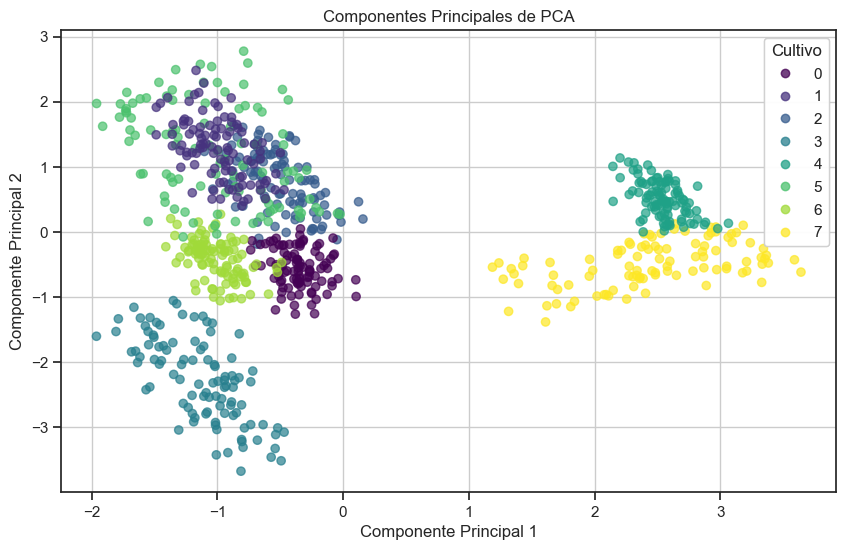

In [101]:

# Separar las características y la clase
X = subconjunto_frutas.drop('Cultivo', axis=1)  
y = subconjunto_frutas['Cultivo']

# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar PCA
pca = PCA(n_components=2, random_state=0)
pca_features = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales y las clases
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['Cultivo'] = y.reset_index(drop=True)

# Graficar las componentes principales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cultivo'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.title('Componentes Principales de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Agregar leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Cultivo")
plt.gca().add_artist(legend1)

plt.grid()
plt.show()


# K-Means

El algoritmo k-means divide los datos en k grupos o clusters, donde cada punto pertenece al cluster cuya distancia es menor.
El agrupamiento se realiza minimizando la suma de distancias cuadradas entre cada objeto y el centroide de su grupo

Creamos el diagrama de codo

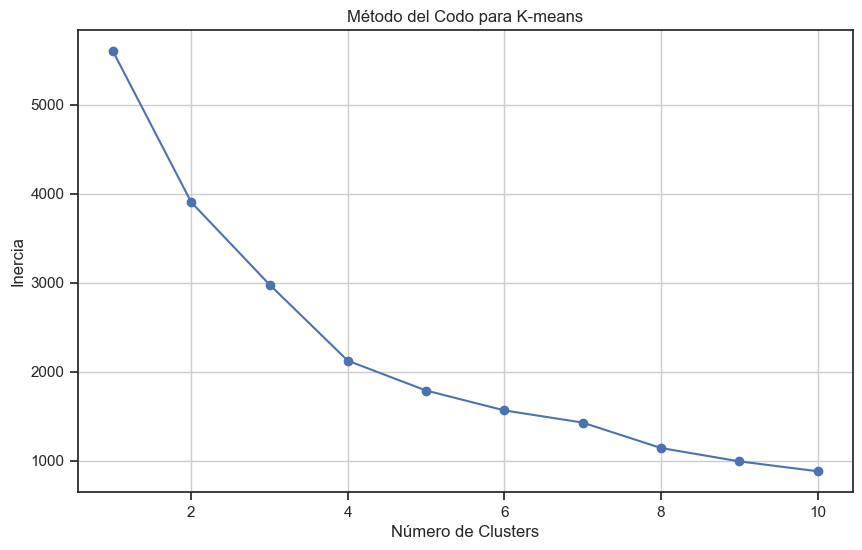

In [110]:

# Aplicar K-means y calcular la inercia
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para encontrar el "codo"
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

Parece que el codo está alrededor de 4 clústeres, ya que es donde la pendiente cambia y se estabiliza. Esto sugiere que debo quedarme con 4 clústeres para obtener un balance óptimo entre simplicidad y precisión del modelo.

In [112]:

def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.inertia_

Número óptimo de clusters según el Gap Statistic: 7


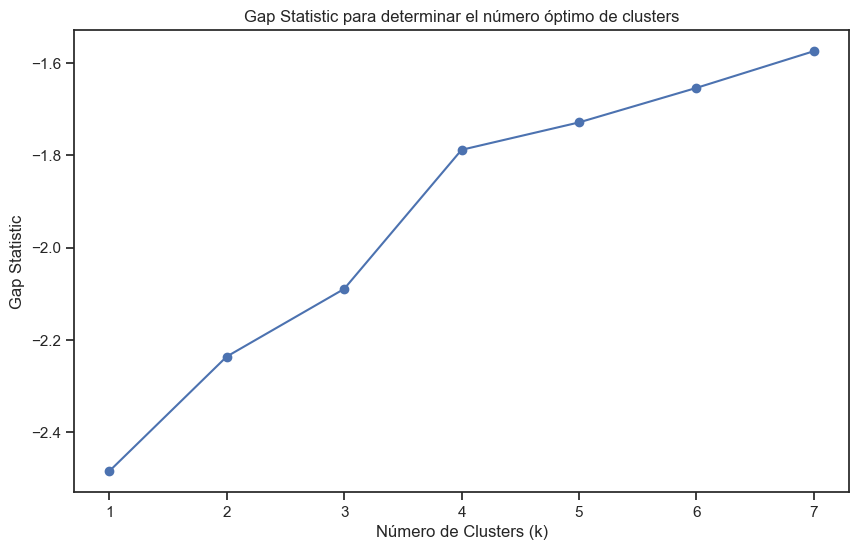

In [115]:

gaps = []
max_k = 7
for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(X_scaled, k)
    # Calculo la inercia de datos aleatorios con la misma estructura que mis datos originales
    inertia_list = []
    for _ in range(10):
        random_data = np.random.rand(*X_scaled.shape)
        intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
        inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    # Aplico la función de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

optimal_k = np.argmax(gaps) + 1
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters')
plt.show()

En este gráfico, parece que el valor del Gap sigue aumentando hasta k = 7.

### Creamos el modelo

In [152]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled) #Entrenamos el modelo
# El metodo labels_ nos da a que cluster corresponde cada observacion
X_scaled['Cluster KMeans'] = kmeans.labels_
X_scaled.head(10)

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cluster KMeans
0,-1.191046,-0.774900,-0.628750,-0.369023,0.600634,-0.496746,0.105208,1
1,-1.078428,-0.900700,-0.643244,-1.212962,0.476660,-0.466994,0.017216,1
2,-1.022118,-0.732967,-0.657739,-1.363283,0.291648,1.286372,-0.106775,1
3,-0.205634,-0.900700,-0.614256,-0.440088,0.810550,0.517777,0.066248,1
4,-1.247355,-0.712000,-0.628750,-0.732906,0.474066,1.151371,0.047381,1
5,-0.374562,-0.753933,-0.628750,-0.299669,0.656816,0.664771,0.047971,1
6,-0.656108,-0.837800,-0.628750,-0.714524,0.432055,0.321647,-0.053452,1
7,-1.078428,-0.649100,-0.599761,-0.677043,0.587467,0.389791,-0.007010,1
8,-0.543490,-0.712000,-0.585267,-1.291452,0.793435,1.526444,0.017137,1
9,-0.825036,-1.047466,-0.628750,-0.615467,0.677129,0.934266,0.047435,1


Interpretaciones

In [148]:
X_scaled = pd.DataFrame(X_scaled, columns=['Nitrogeno', 'Fosforo', 'Potasio', 'Temperatura', 'Humedad', 'pH', 'Lluvia'])


In [154]:
X_scaled.groupby('Cluster KMeans').mean()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
Cluster KMeans,,,,,,,
0,1.337867,-0.203256,-0.451702,0.184613,0.076834,0.319222,-0.661645
1,-0.628235,1.518324,1.719347,-0.596159,0.269883,-0.385809,-0.362168
2,-0.503440,-0.711838,-0.620042,-0.011592,0.659484,0.314892,1.010688
3,-0.682292,-0.708226,-0.745865,0.775461,-2.427173,-0.813320,-0.282058


In [126]:

# Características normalizadas que tendría el centroide de ese cluster
centroides = kmeans.cluster_centers_
print("Centroides de los clusters:\n", centroides)

Centroides de los clusters:
 [[ 1.33786709 -0.20325644 -0.4517024   0.18461276  0.07683413  0.31922157
  -0.66164509]
 [-0.62823514  1.51832403  1.71934668 -0.59615851  0.26988265 -0.38580874
  -0.36216811]
 [-0.68229201 -0.70822623 -0.74586494  0.77546063 -2.42717266 -0.81332038
  -0.28205844]
 [-0.50344033 -0.71183769 -0.6200421  -0.01159167  0.65948401  0.31489211
   1.01068829]]


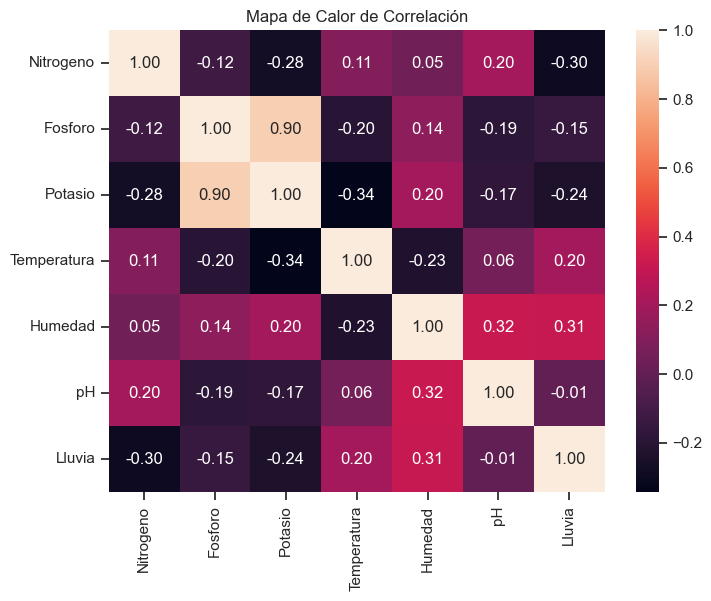

In [129]:

plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled[['Nitrogeno', 'Fosforo', 'Potasio', 'Temperatura', 'Humedad', 'pH', 'Lluvia']].corr(), annot=True, fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()


Para graficar, vamos a tomar fosforo, potasio, nitrogeno ya que son las que mas correlacion tienen entre si.

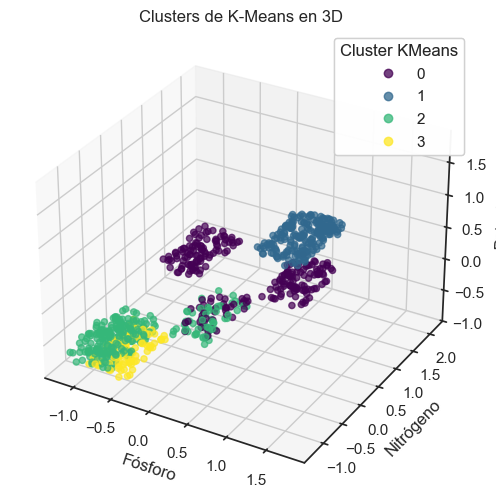

In [189]:
from mpl_toolkits.mplot3d import Axes3D

# Crear un DataFrame con las características y los clusters
kmeans_df = pd.DataFrame(X_scaled, columns=['Nitrogeno', 'Fosforo', 'Potasio'])
kmeans_df['Cluster KMeans'] = kmeans.labels_

# Crear la figura y el subplot en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar las componentes principales en 3D
scatter = ax.scatter(kmeans_df['Fosforo'], kmeans_df['Nitrogeno'], kmeans_df['Potasio'], 
                     c=kmeans_df['Cluster KMeans'], cmap='viridis', alpha=0.7)

# Configurar título y etiquetas
ax.set_title('Clusters de K-Means en 3D')
ax.set_xlabel('Fósforo')
ax.set_ylabel('Nitrógeno')
ax.set_zlabel('Potasio')

# Agregar leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster KMeans")
ax.add_artist(legend1)

# Mostrar gráfico
plt.show()


Los clusters parecen estar bien definidos en el espacio tridimensional, lo que indica que K-Means encontro patrones distintivos en los niveles de los tres nutrientes. La elección de variables para el análisis y el número de clusters es adecuada para capturar la variabilidad en mis datos.

# Clustering Jerarquico

Este metodo parte de todos los datos por separado, es decir, cada dato tiene su cluster y los va agrupando segun la distancia entre ellos hasta llegar a un solo grupo

In [183]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


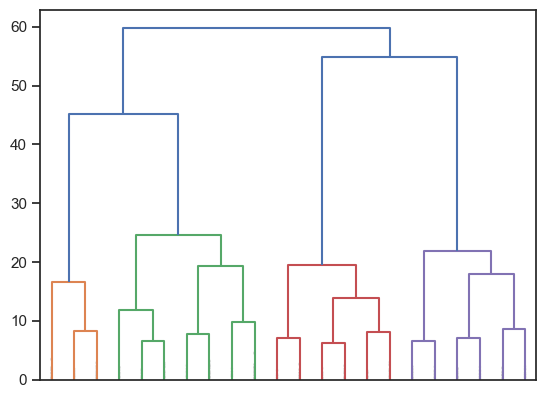

In [163]:
Z = linkage(X_scaled, "ward")
dendrogram(Z,  truncate_mode = 'lastp', p = 22, show_leaf_counts = False, show_contracted = True)
plt.show()

### Aplicar clustering jerárquico y calcular el score de Silhouette

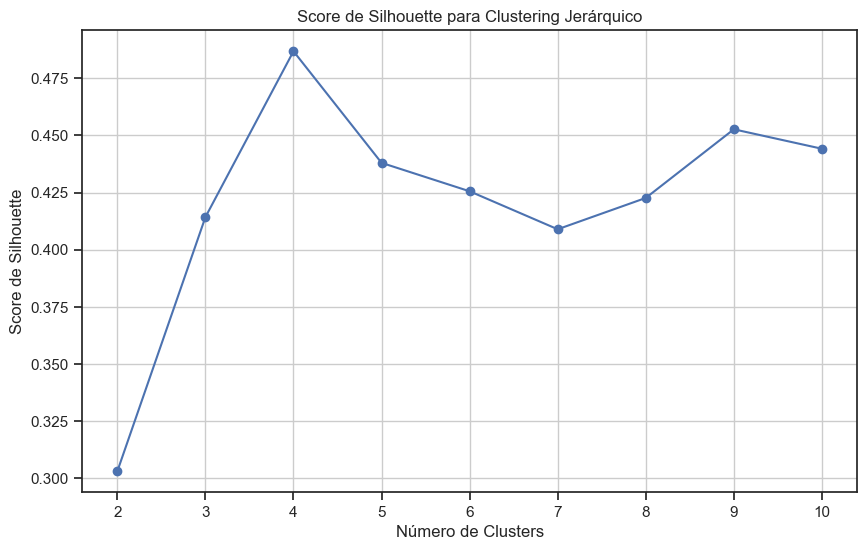

In [188]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, max_k + 1):  # Comenzamos en 2 porque el score de Silhouette no se puede calcular para un solo cluster
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el score de Silhouette
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.title('Score de Silhouette para Clustering Jerárquico')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Silhouette')
plt.grid()
plt.show()


Basándonos en este gráfico, el número óptimo de clusters para este conjunto de datos parece ser 4, ya que proporciona la mejor separación entre clusters según el Score de Silhouette.

In [164]:
from scipy.spatial.distance import cdist

distancias=[]
for i in range(1, 23):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(X_scaled)

    # Calculo la matriz de distancias entre puntos
    pairwise_distances = cdist(X_scaled, X_scaled, 'euclidean')

    # Calculo la distancia total entre los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()
    distancias.append(distancia_total)

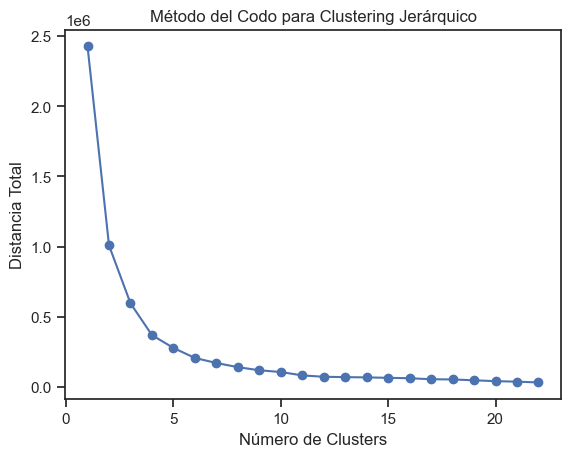

In [182]:
plt.plot(range(1, 23), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

El gráfico del Método del Codo apoya la idea de que entre 4 y 5 clusters es una buena elección, coincidiendo con el resultado del Score de Silhouette que también apuntaba a 4 clusters como la mejor opción.

### Calcular el GAP Statistic

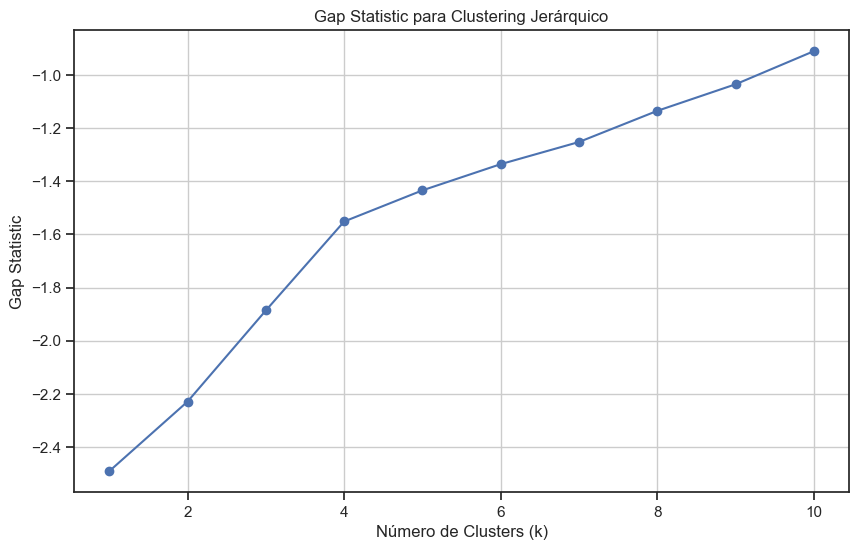

Número óptimo de clusters según el Gap Statistic: 10


In [199]:
def calculate_intra_cluster_dispersion(X, n_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical.fit_predict(X)
    return np.sum([np.sum((X[cluster_labels == i] - X[cluster_labels == i].mean(axis=0))**2, axis=0) for i in range(n_clusters)])

gaps = []
max_k = 10
for k in range(1, max_k + 1):
    # Calcular la inercia real sobre tus datos
    real_inertia = calculate_intra_cluster_dispersion(X_scaled, k)
    
    # Calcular la inercia de datos aleatorios
    inertia_list = []
    for _ in range(10):
        random_data = np.random.rand(*X_scaled.shape)
        random_inertia = calculate_intra_cluster_dispersion(random_data, k)
        inertia_list.append(random_inertia)

    reference_inertia = np.mean(inertia_list)

    # Aplico la función de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

# Graficar el Gap Statistic
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.title('Gap Statistic para Clustering Jerárquico')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.grid()
plt.show()

# Número óptimo de clusters
optimal_k = np.argmax(gaps) + 1
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)


Como conclusion general, no podemos decir exactamente cual es el numero optimo de cluster, pero si podemos decir que está entre 4 y 10  